In [67]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
d=pd.read_csv("D:/coe/Advertising.csv")

In [3]:
d.shape

(200, 5)

In [6]:
d.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  200 non-null    int64  
 1   TV          200 non-null    float64
 2   Radio       200 non-null    float64
 3   Newspaper   200 non-null    float64
 4   Sales       200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB


In [18]:
d.head(10)

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9
5,6,8.7,48.9,75.0,7.2
6,7,57.5,32.8,23.5,11.8
7,8,120.2,19.6,11.6,13.2
8,9,8.6,2.1,1.0,4.8
9,10,199.8,2.6,21.2,10.6


In [8]:
d.tail(10)

,Unnamed: 0,TV,Radio,Newspaper,Sales
190,191,39.5,41.1,5.8,10.8
191,192,75.5,10.8,6.0,9.9
192,193,17.2,4.1,31.6,5.9
193,194,166.8,42.0,3.6,19.6
194,195,149.7,35.6,6.0,17.3
195,196,38.2,3.7,13.8,7.6
196,197,94.2,4.9,8.1,9.7
197,198,177.0,9.3,6.4,12.8
198,199,283.6,42.0,66.2,25.5
199,200,232.1,8.6,8.7,13.4


In [9]:
d.isnull()

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,False,False,False,False,False
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,False
...,...,...,...,...,...
195,False,False,False,False,False
196,False,False,False,False,False
197,False,False,False,False,False
198,False,False,False,False,False


In [10]:
d.isnull().sum()

Unnamed: 0    0
TV            0
Radio         0
Newspaper     0
Sales         0
dtype: int64

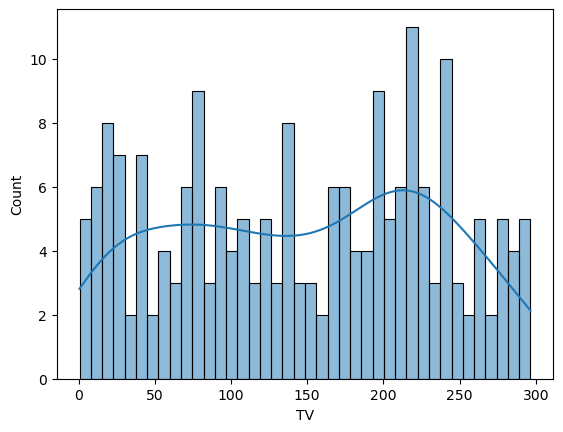

In [29]:
sns.histplot(x=d['TV'],kde=True,bins=40)
plt.show()

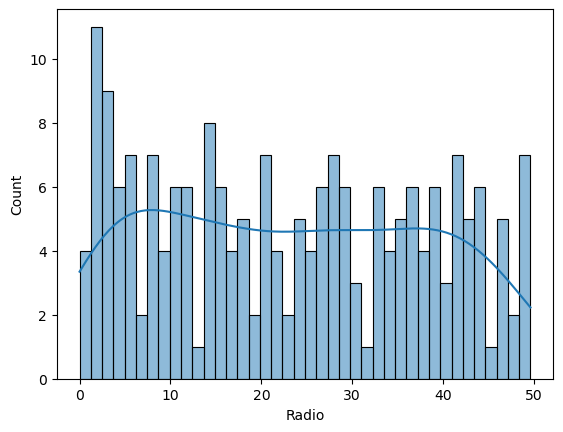

In [30]:
sns.histplot(x=d['Radio'],kde=True,bins=40)
plt.show()

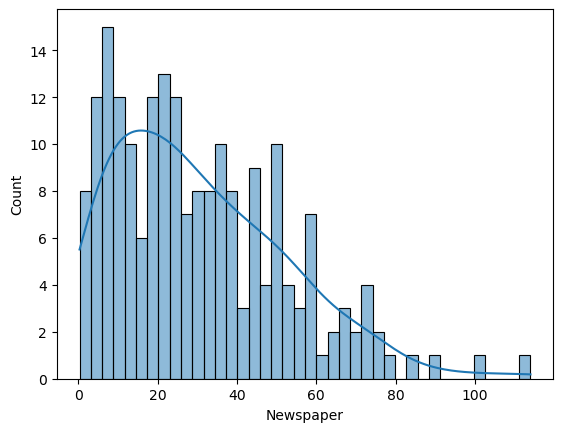

In [31]:
sns.histplot(x=d['Newspaper'],kde=True,bins=40)
plt.show()

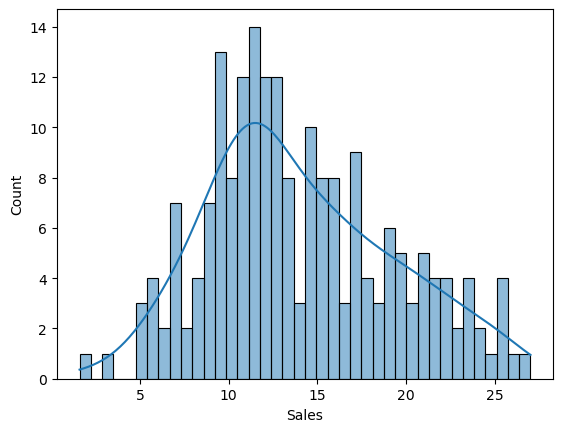

In [32]:
sns.histplot(x=d['Sales'],kde=True,bins=40)
plt.show()

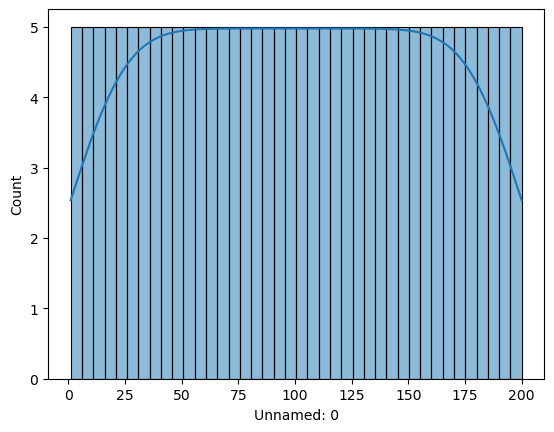

In [33]:
sns.histplot(x=d['Unnamed: 0'],kde=True,bins=40)
plt.show()

In [34]:
d['TV'].skew()

np.float64(-0.06985336213274573)

In [35]:
d['Radio'].skew()

np.float64(0.09417463149664404)

In [36]:
d['Newspaper'].skew()

np.float64(0.8947204074986175)

In [37]:
d['Sales'].skew()

np.float64(0.4075714250767127)

In [38]:
d['Unnamed: 0'].skew()

np.float64(0.0)

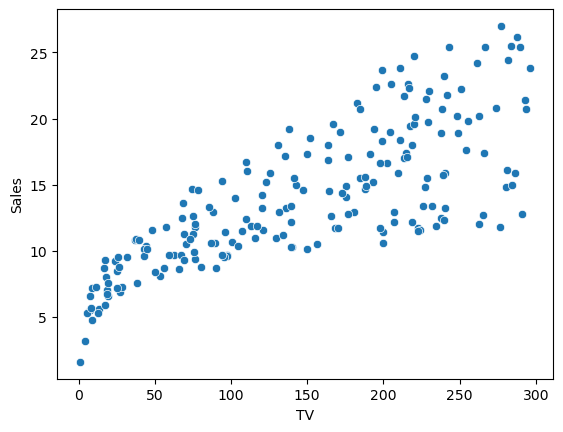

In [49]:
sns.scatterplot(x=d['TV'],y=d['Sales'])
plt.show()

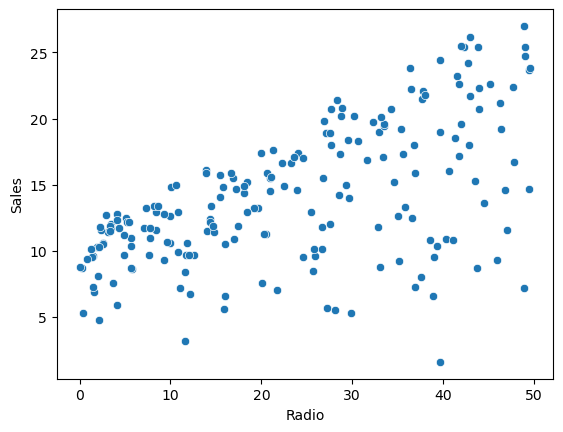

In [48]:
sns.scatterplot(x=d['Radio'], y=d['Sales'])
plt.show()


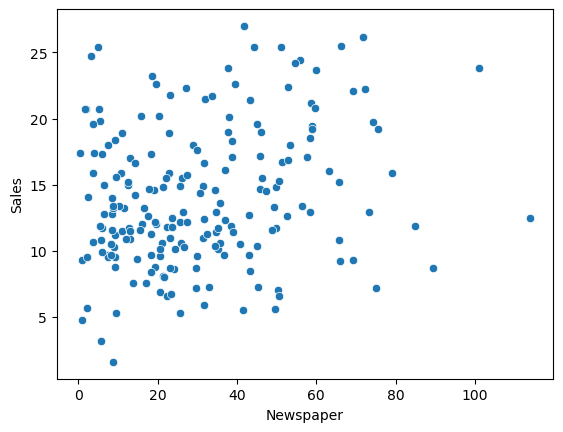

In [50]:
sns.scatterplot(x=d['Newspaper'], y=d['Sales'])
plt.show()


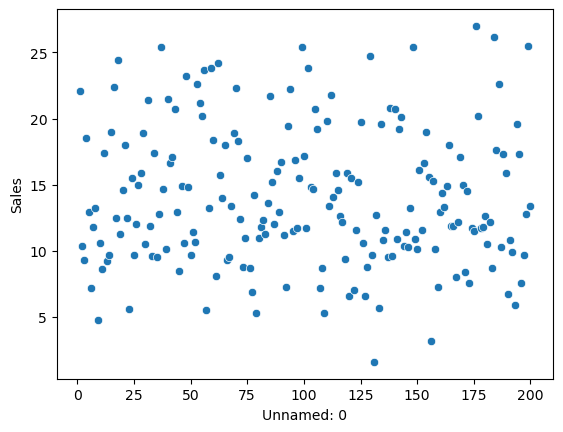

In [51]:
sns.scatterplot(x=d['Unnamed: 0'], y=d['Sales'])
plt.show()


In [52]:
TV vs Sales: Positive — because sales increase when TV advertising increases.

Radio vs Sales: Positive — because higher radio ads generally lead to higher sales.

Newspaper vs Sales: Random — because changes in newspaper spending do not clearly affect sales.

Unnamed vs Sales: Random — because it is just an index number and has no real impact on sales.


SyntaxError: invalid character '—' (U+2014) (1733458521.py, line 1)

In [53]:
d.corr()

,Unnamed: 0,TV,Radio,Newspaper,Sales
Unnamed: 0,1.000000,0.017715,-0.110680,-0.154944,-0.051616
TV,0.017715,1.000000,0.054809,0.056648,0.782224
Radio,-0.110680,0.054809,1.000000,0.354104,0.576223
Newspaper,-0.154944,0.056648,0.354104,1.000000,0.228299
Sales,-0.051616,0.782224,0.576223,0.228299,1.000000


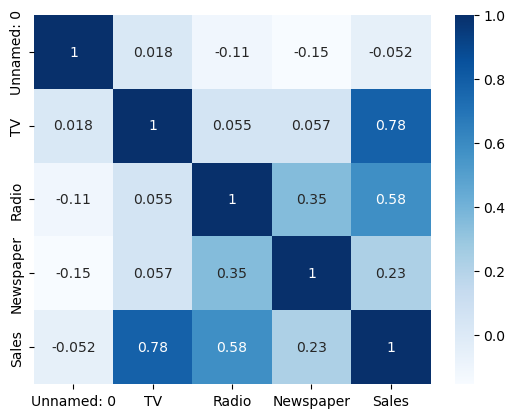

In [59]:
sns.heatmap(d.corr(),annot=True,cmap='Blues')
plt.show()
            

In [60]:
d.drop('Unnamed: 0',axis=1,inplace=True)

In [62]:
x=d[['TV']]
y=d.Sales

In [63]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(y, y, test_size=0.2, random_state=4)

In [65]:
print(len(x_test))
print(len(x_train))

40
160


In [76]:
x_train = x_train.reshape(-1, 1)
x_test = x_test.reshape(-1, 1)

from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(x_train, y_train)
y_pred = lr.predict(x_test)


In [77]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(mae, mse, rmse, r2)

8.881784197001252e-16 2.208810534618833e-30 1.4862067603866002e-15 1.0


In [80]:
x=d[['Radio']]
y=d.Sales

In [81]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(y, y, test_size=0.2, random_state=4)

In [82]:
print(len(x_test))
print(len(x_train))

40
160


In [85]:
import numpy as np
from sklearn.linear_model import LinearRegression

x_train = x_train.to_numpy().reshape(-1, 1)
x_test = x_test.to_numpy().reshape(-1, 1)

lr = LinearRegression()
lr.fit(x_train, y_train)
y_pred = lr.predict(x_test)


In [86]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(mae, mse, rmse, r2)

8.881784197001252e-16 2.208810534618833e-30 1.4862067603866002e-15 1.0
